## **자동차연비 예측 회귀모델**

https://archive.ics.uci.edu/dataset/9/auto+mpg

1. 데이터수집 
2. 전체리 및 데이터분할
3. 모델 구축 및 학습
4. 모델 평가 
5. 예측 

사용자 입력정보를 통해 예상 연비 출력 
1. cylinders : 
2. displacement :
3. weight :
4. acceleration :
5. model_year :

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                "acceleration", "model_year", "origin", "car_name"]
mpg_df = pd.read_csv('data/auto+mpg/auto-mpg.data', names=columns, sep='\\s+')

In [7]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
mpg_input = mpg_df[['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']].to_numpy()
mpg_target = mpg_df['mpg'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mpg_input, mpg_target, random_state=42, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8038762126909872
0.8243783466572336


In [13]:
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test)

[31.55530063 30.68905579 21.80699343 16.98750418 12.60540632 26.18220527
 28.90400773  9.12932725 17.2263025  22.72748429 12.64724664 34.99860292
 26.65366916 14.05377015 24.81048136  5.91904198 30.86103851 23.77107121
 15.84883975 35.13876234 23.46010907 19.72127175 29.30314676 30.31152375
 15.13770624 34.50460261 25.76340158 25.77795876 22.1712103   7.95877504
 29.37380102 34.94123359 20.00761663 24.90309123 33.10884447 12.14155939
 24.4533325  22.15537782 12.38035609 26.95056011 27.61412851 27.409148
 20.27797162  7.61803953 23.25740825 33.65968202 26.62862863 24.43589474
 22.74574056 27.7057552  23.48482317 32.53661224 31.29782712 10.53948915
 29.01666461  9.38025921 19.45145993 28.30972594 24.25458098 20.79124389
 16.43259089 30.76338901 24.93185818 20.29152606 21.6551419  24.35255149
 25.88139241 33.73576891 29.30894257 12.72227039 32.47485006 13.30458066
  9.39568133 19.60096111 28.55063052 22.64186845 20.6765427  30.880512
 29.53431257 20.20456815]
[33.  28.  19.  13.  14.  27.

In [14]:
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test., y_test)

(80, 5)
(80,)


In [15]:
# print(lr.coef_)
# print(lr.intercept_)

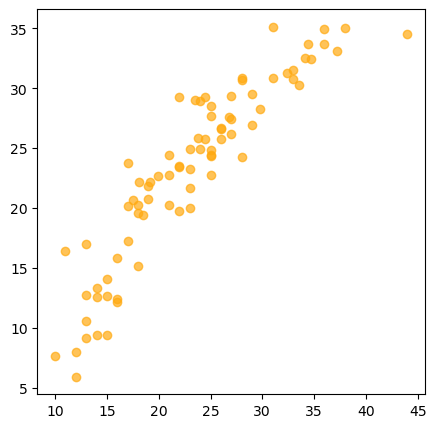

In [16]:

y_pred = lr.predict(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, label="예측값", color='#fa1', alpha=0.7)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
#plt.legend()
plt.show()


In [44]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True)

In [50]:
scores

{'fit_time': array([0.13637424, 0.14669728, 0.16352391, 0.13782597, 0.15084195]),
 'score_time': array([0.03270721, 0.02964878, 0.03009152, 0.02988029, 0.03214884]),
 'test_score': array([0.86950449, 0.81952141, 0.85343085, 0.77782998, 0.86259999]),
 'train_score': array([0.97960789, 0.98042574, 0.97937206, 0.98331889, 0.97906083])}

In [52]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

0.9803570828484245
0.8365773440307324


In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [60]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9804253161584638
0.9084049403025656


In [ ]:
# r2_score(y_text, y_pred)